# STAR PERFORMERS

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from bs4 import BeautifulSoup
import xmltodict
from pprint import pprint
import os
import csv
from api_keys import z_keys
from scipy.stats import sem
from scipy import stats as st


In [2]:

# #config
# from api_keys import api_key
# from api_keys import g_Api

# # # Import API key
# # import api_keys

# # Incorporated citipy to determine city based on latitude and longitude
# from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# # Range of latitudes and longitudes
# lat_range = (-90, 90)
# lng_range = (-180, 180)
# import openweathermapy.core as owm

In [3]:
ny18_df = pd.read_excel("/Users/JBagga/workspace/project_test/2018NYSales.xls")

In [51]:
ny18_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,4844809,2018-05-22
1,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,0,2018-05-23
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,1,0,1,1883,5200,1900,1,A4,6100000,2018-12-03
3,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,390,35,,B1,113 AVENUE C,,...,2,0,2,1218,4764,1899,1,B1,0,2018-04-25
4,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,,B9,166 AVENUE A,,...,2,0,2,1510,4520,1900,1,B9,0,2018-11-29
5,1,ALPHABET CITY,02 TWO FAMILY DWELLINGS,1,404,1,,B9,166 AVENUE A,,...,2,0,2,1510,4520,1900,1,B9,0,2018-11-29
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,,C7,133 AVENUE D,,...,20,2,22,3481,14588,1930,2,C7,8300000,2018-12-10
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,12,4,16,4186,10588,1900,2,C7,10350000,2018-09-07
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,18,0,18,2271,10650,1910,2,C1,5000000,2018-09-05
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,,C3,203 EAST 7TH STREET,,...,4,0,4,1950,5446,2001,2,C3,6250000,2018-05-09


In [5]:
ny18_df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,16369.0,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,16369.000000,1.636900e+04,16369.000000,16369.000000,1.636900e+04
mean,1.0,1134.104160,736.368990,10015.058281,1.837681,0.341438,2.305761,3799.704258,3.660774e+03,1702.245586,2.120716,3.068981e+06
std,0.0,526.607997,910.316535,385.473717,13.408085,4.091756,14.379706,12112.753126,2.819805e+04,652.533099,0.541500,2.760203e+07
min,1.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,1.0,798.000000,29.000000,10013.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1910.000000,2.000000,2.307590e+05
50%,1.0,1171.000000,1002.000000,10022.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1931.000000,2.000000,8.150000e+05
75%,1.0,1469.000000,1185.000000,10028.000000,1.000000,0.000000,1.000000,891.000000,1.160000e+03,1973.000000,2.000000,1.850000e+06
max,1.0,2250.000000,9101.000000,10463.000000,597.000000,180.000000,601.000000,191502.000000,1.133548e+06,2018.000000,4.000000,2.397502e+09


In [6]:
ny18_df_1 = ny18_df[ny18_df['SALE PRICE'] > 100000]

In [7]:
ny18_df_1

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,390,61,,A4,189 EAST 7TH STREET,,...,1,0,1,987,2183,1860,1,A4,4844809,2018-05-22
2,1,ALPHABET CITY,01 ONE FAMILY DWELLINGS,1,400,19,,A4,526 EAST 5TH STREET,,...,1,0,1,1883,5200,1900,1,A4,6100000,2018-12-03
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,379,37,,C7,133 AVENUE D,,...,20,2,22,3481,14588,1930,2,C7,8300000,2018-12-10
7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,385,2,,C7,21-23 AVENUE B,,...,12,4,16,4186,10588,1900,2,C7,10350000,2018-09-07
8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,389,18,,C1,200 EAST 7TH STREET,,...,18,0,18,2271,10650,1910,2,C1,5000000,2018-09-05
9,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,390,54,,C3,203 EAST 7TH STREET,,...,4,0,4,1950,5446,2001,2,C3,6250000,2018-05-09
10,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,390,64,,C4,187 EAST 7TH STREET,,...,8,2,10,1642,5220,1910,2,C4,2400000,2018-05-18
14,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,393,23,,C7,632 EAST 11TH STREET,,...,33,2,35,4740,19980,1900,2,C7,17250000,2018-12-05
15,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,393,47,,C4,377 EAST 10TH,,...,12,0,12,2370,10715,1900,2,C4,954623,2018-06-04
20,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,398,33,,C7,28 AVENUE B,,...,16,1,17,1933,8699,1900,2,C7,5000000,2018-03-05


In [8]:
ny18_df_2 = ny18_df_1.loc[:,['BLOCK','LOT','ADDRESS','ZIP CODE','GROSS SQUARE FEET','SALE PRICE','SALE DATE']]

In [9]:
ny18_df_2['ZIP CODE'].nunique()

47

In [10]:
ny18_df_3 = ny18_df_2.groupby('ZIP CODE').agg('count')
ny18_df_4 = ny18_df_3.reset_index()

In [11]:
ny18_df_4.head()

,ZIP CODE,BLOCK,LOT,ADDRESS,GROSS SQUARE FEET,SALE PRICE,SALE DATE
0,0,19,19,19,19,19,19
1,10001,190,190,190,190,190,190
2,10002,357,357,357,357,357,357
3,10003,563,563,563,563,563,563
4,10004,53,53,53,53,53,53


In [12]:
ny18_df_5 = ny18_df_4.drop([0])

In [13]:
ny18_df_5.head()

,ZIP CODE,BLOCK,LOT,ADDRESS,GROSS SQUARE FEET,SALE PRICE,SALE DATE
1,10001,190,190,190,190,190,190
2,10002,357,357,357,357,357,357
3,10003,563,563,563,563,563,563
4,10004,53,53,53,53,53,53
5,10005,120,120,120,120,120,120


Text(0.5, 1.0, 'Manhattan Apartment Sales by Zip Code 2018')

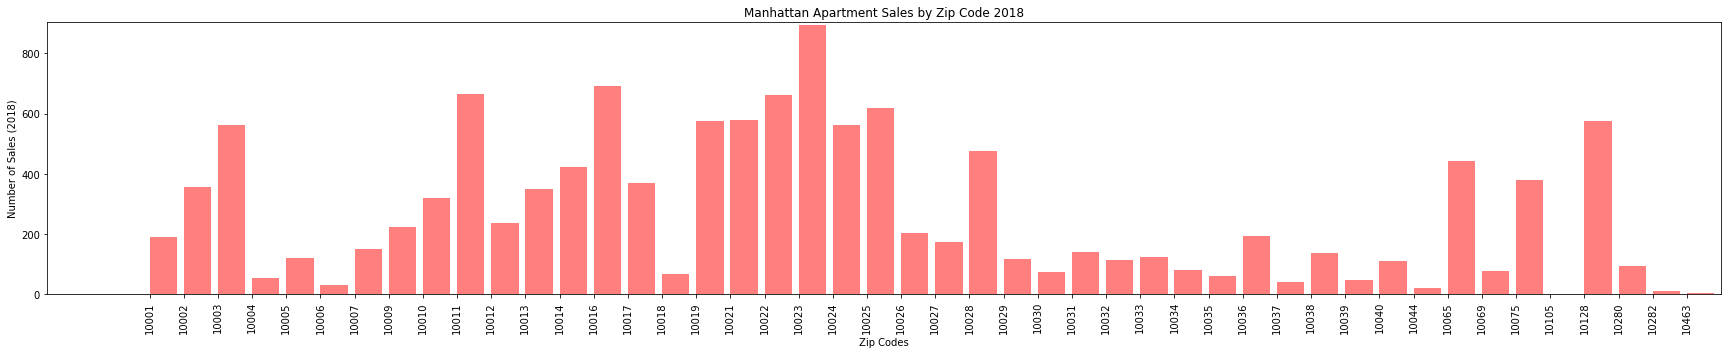

In [14]:
x = np.arange(len(ny18_df_5))
y = ny18_df_5['SALE PRICE']
tick_locations = [value for value in x]
plt.figure(figsize=(30,5))
plt.bar(x,y,color='r',alpha=0.5,align='edge')
plt.xticks(tick_locations,ny18_df_5['ZIP CODE'],rotation='vertical')
plt.xlim(-3,len(x))
plt.ylim(0,max(y)+10)
plt.xlabel("Zip Codes")
plt.ylabel("Number of Sales (2018)")
plt.title("Manhattan Apartment Sales by Zip Code 2018")



In [15]:
ny18_df_6 =ny18_df_1[ny18_df_1['ZIP CODE']>10000]

In [16]:
ny18_df_7 = ny18_df_6.groupby(['NEIGHBORHOOD','ZIP CODE','SALE DATE'])\
                              ['GROSS SQUARE FEET','SALE PRICE'].agg({'GROSS SQUARE FEET':['sum'],\
                            'SALE PRICE':['sum','count']})
# Using ravel, and a string join, we can create better names for the columns:
ny18_df_7.columns = ["_".join(x) for x in ny18_df_7.columns.ravel()]

In [17]:
ny18_df_8=ny18_df_7.reset_index()

In [18]:
ny18_df_8['Price per SqFt'] = ny18_df_8['SALE PRICE_sum'] / (ny18_df_8['GROSS SQUARE FEET_sum'])
                                                             
ny18_df_8['Average Sale Amount'] = ny18_df_8['SALE PRICE_sum'] / ny18_df_8['SALE PRICE_count']
ny18_df_8

,NEIGHBORHOOD,ZIP CODE,SALE DATE,GROSS SQUARE FEET_sum,SALE PRICE_sum,SALE PRICE_count,Price per SqFt,Average Sale Amount
0,ALPHABET CITY,10009,2018-01-03,0,445000,1,inf,4.450000e+05
1,ALPHABET CITY,10009,2018-01-05,0,1100000,1,inf,1.100000e+06
2,ALPHABET CITY,10009,2018-01-10,1039,2750000,2,2646.775746,1.375000e+06
3,ALPHABET CITY,10009,2018-01-11,0,1177000,2,inf,5.885000e+05
4,ALPHABET CITY,10009,2018-01-16,0,375000,1,inf,3.750000e+05
5,ALPHABET CITY,10009,2018-01-18,0,455000,1,inf,4.550000e+05
6,ALPHABET CITY,10009,2018-01-31,0,435000,1,inf,4.350000e+05
7,ALPHABET CITY,10009,2018-02-08,420,1185000,2,2821.428571,5.925000e+05
8,ALPHABET CITY,10009,2018-02-15,671,692410,1,1031.907601,6.924100e+05
9,ALPHABET CITY,10009,2018-02-16,650,1150000,1,1769.230769,1.150000e+06


In [19]:
# ny18_df_6.rename(columns={ny18_df_6.columns[4]:"Test"})

In [20]:
# ny18_df_6.columns = ny18_df_6.columns.droplevel(1)

In [21]:
len(ny18_df_8['GROSS SQUARE FEET_sum'])    #.value_counts()

ny18_df_9 = ny18_df_8[ny18_df_8['GROSS SQUARE FEET_sum']>0]
len(ny18_df_9['GROSS SQUARE FEET_sum'])

### About 50% of Sale Transactions DO NOT have Gross Square Feet, so Price Per Square Feet may be skewed

3887

In [22]:
ny18_df_11=ny18_df_8.loc[:,['NEIGHBORHOOD','Average Sale Amount']]

In [23]:
ny18_df_11 = ny18_df_11.groupby('NEIGHBORHOOD').agg('mean').reset_index()
ny18_df_11.head()

,NEIGHBORHOOD,Average Sale Amount
0,ALPHABET CITY,2.774800e+06
1,CHELSEA,8.957650e+06
2,CHINATOWN,3.922003e+06
3,CIVIC CENTER,4.721826e+06
4,CLINTON,3.576193e+06


In [24]:
ny18_df_11.describe()

,Average Sale Amount
count,3.900000e+01
mean,4.455251e+06
std,4.233914e+06
min,1.018923e+06
25%,2.537770e+06
50%,2.940608e+06
75%,4.464540e+06
max,2.344228e+07


Text(0.5, 1.0, 'Manhattan Average Apt Sales by Neighborhood 2018')

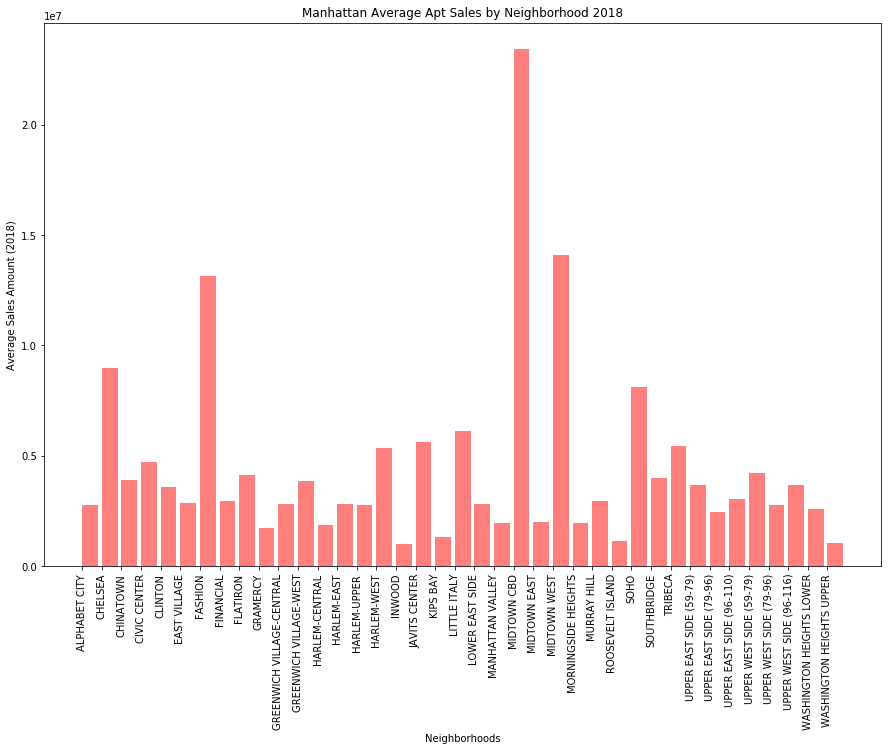

In [25]:
x3 = np.arange(len(ny18_df_11))
y3 = ny18_df_11['Average Sale Amount']
tick_locations = [value for value in x3]
plt.figure(figsize=(15,10))
plt.bar(x3,y3,color='r',alpha=0.5,align='edge')
plt.xticks(tick_locations,ny18_df_11['NEIGHBORHOOD'],rotation='vertical')
# plt.xlim(0,len(x))
# plt.ylim(1000000,max(y))
plt.xlabel("Neighborhoods")
plt.ylabel("Average Sales Amount (2018)")
plt.title("Manhattan Average Apt Sales by Neighborhood 2018")

In [26]:
ny18_df_14=ny18_df_6.groupby('NEIGHBORHOOD')['SALE PRICE'].aggregate([{'Sales Sum':'sum','Sales Count':'count',\
                                                                 'Avg Sales':'mean','Std Error':'sem'}])
ny18_df_14.head()

/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/groupby.py:3558: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  results[name] = obj.aggregate(func)


NaN                                        
                Sales Sum Sales Count     Avg Sales     Std Error
NEIGHBORHOOD                                                     
ALPHABET CITY   359017469         111  3.234392e+06  8.915244e+05
CHELSEA        5061553749         512  9.885847e+06  5.012391e+06
CHINATOWN       308421526          86  3.586297e+06  6.710871e+05
CIVIC CENTER    545071152         112  4.866707e+06  4.945096e+05
CLINTON         734252039         214  3.431084e+06  1.052706e+06

In [27]:
ny18_df_14.columns = ny18_df_14.columns.droplevel(0)


In [28]:
ny18_df_15 = ny18_df_14.reset_index()
ny18_df_15.head()

,NEIGHBORHOOD,Sales Sum,Sales Count,Avg Sales,Std Error
0,ALPHABET CITY,359017469,111,3.234392e+06,8.915244e+05
1,CHELSEA,5061553749,512,9.885847e+06,5.012391e+06
2,CHINATOWN,308421526,86,3.586297e+06,6.710871e+05
3,CIVIC CENTER,545071152,112,4.866707e+06,4.945096e+05
4,CLINTON,734252039,214,3.431084e+06,1.052706e+06


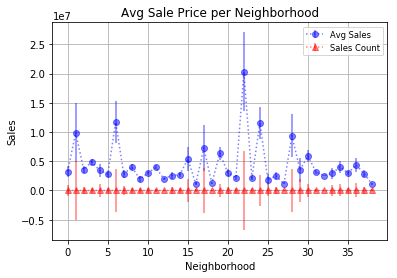

In [29]:
fig, ax = plt.subplots()


ax.errorbar(np.arange(0, len(ny18_df_15['NEIGHBORHOOD'])), ny18_df_15['Avg Sales'], yerr=ny18_df_15['Std Error'], fmt="o", color="b",
            alpha=0.5, label='Avg Sales', linestyle='dotted')
ax.errorbar(np.arange(0, len(ny18_df_15['NEIGHBORHOOD'])), ny18_df_15['Sales Count'], yerr=ny18_df_15['Std Error'], fmt="^", color="r",
            alpha=0.5, label='Sales Count', linestyle='dotted')


# ax.set_xlim(-0.5, len(ny18_df_15['NEIGHBORHOOD']))

# plt.figure()

# ax.set_xlim(0,'Timepoint')

# x3 = np.arange(len(ny18_df_11))
# y3 = ny18_df_11['Average Sale Amount']
# tick_locations = [value for value in x3]
# plt.figure(figsize=(15,10))
# plt.bar(x3,y3,color='r',alpha=0.5,align='edge')
# plt.xticks(tick_locations,ny18_df_11['NEIGHBORHOOD'],rotation='vertical')

ax.set_xlabel("Neighborhood")

ax.set_ylabel("Sales")

ax.set_title('Avg Sale Price per Neighborhood')

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()

#plt.savefig('NeighborhoodSaleswithSEM.png')

plt.show()

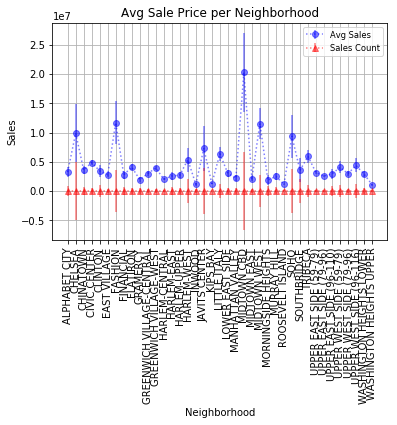

In [30]:
fig, ax = plt.subplots()

x4 = np.arange(len(ny18_df_15))
y4 = ny18_df_15['Avg Sales']
y5=ny18_df_15['Sales Count']
tick_locations = [value for value in x4]
ax.errorbar(x4, y4, yerr=ny18_df_15['Std Error'], fmt="o", color="b",
            alpha=0.5, label='Avg Sales', linestyle='dotted')

ax.errorbar(x4, y5, yerr=ny18_df_15['Std Error'], fmt="^", color="r",
            alpha=0.5, label='Sales Count', linestyle='dotted')

plt.xticks(tick_locations,ny18_df_15['NEIGHBORHOOD'],rotation='vertical')

ax.set_xlabel("Neighborhood")

ax.set_ylabel("Sales")

ax.set_title('Avg Sale Price per Neighborhood')

plt.legend(loc="best", fontsize="small", fancybox=True)
plt.grid()
# plt.figure(figsize=(35,20))
#plt.savefig('NeighborhoodSaleswithSEM.png')

plt.show()

Text(0.5, 1.0, 'Avg Sale Price per Neighborhood')

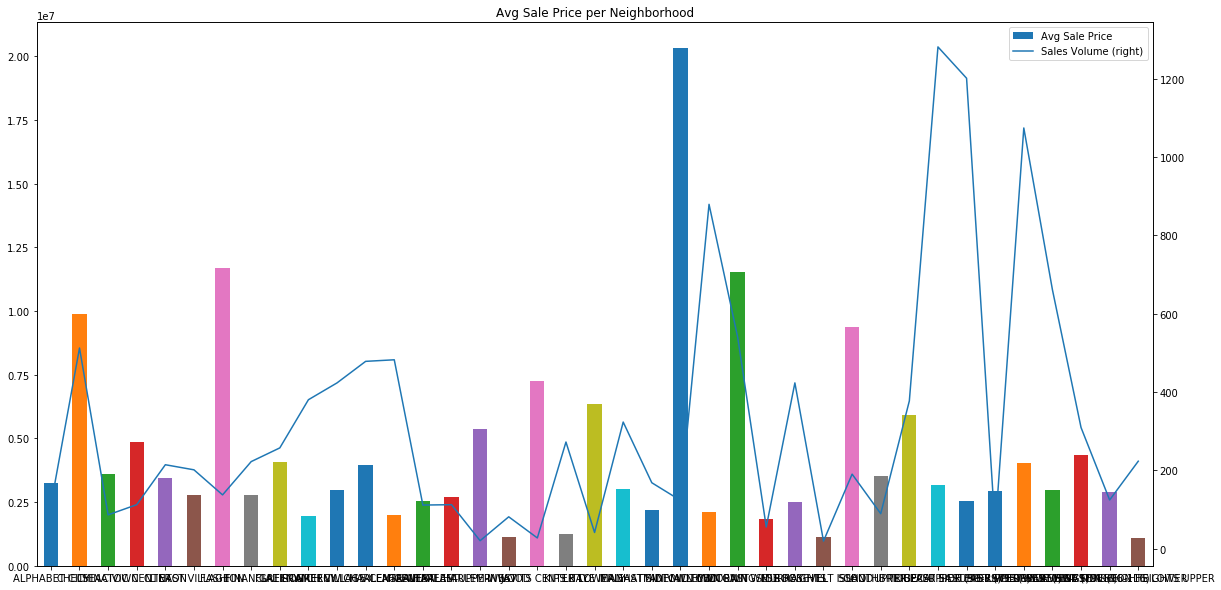

In [31]:
x6 = np.arange(0, len(ny18_df_15['NEIGHBORHOOD']))
y6 = ny18_df_15['Avg Sales']
y7=ny18_df_15['Sales Count']



ny18_df_15['Avg Sales'].plot(kind='bar',label="Avg Sale Price", legend=True,figsize=(20,10))
ny18_df_15['Sales Count'].plot(secondary_y=True, label="Sales Volume", legend=True,figsize=(20,10))
# tick_locations = x6
# plt.xlabel("Neighborhood")
# plt.legend(loc="best", fontsize="large", fancybox=True)
tick_locations = x6
plt.xticks(tick_locations,ny18_df_15['NEIGHBORHOOD'],rotation='vertical')
plt.title('Avg Sale Price per Neighborhood')

Text(0.5, 1.0, 'Avg Sale Price per Neighborhood')

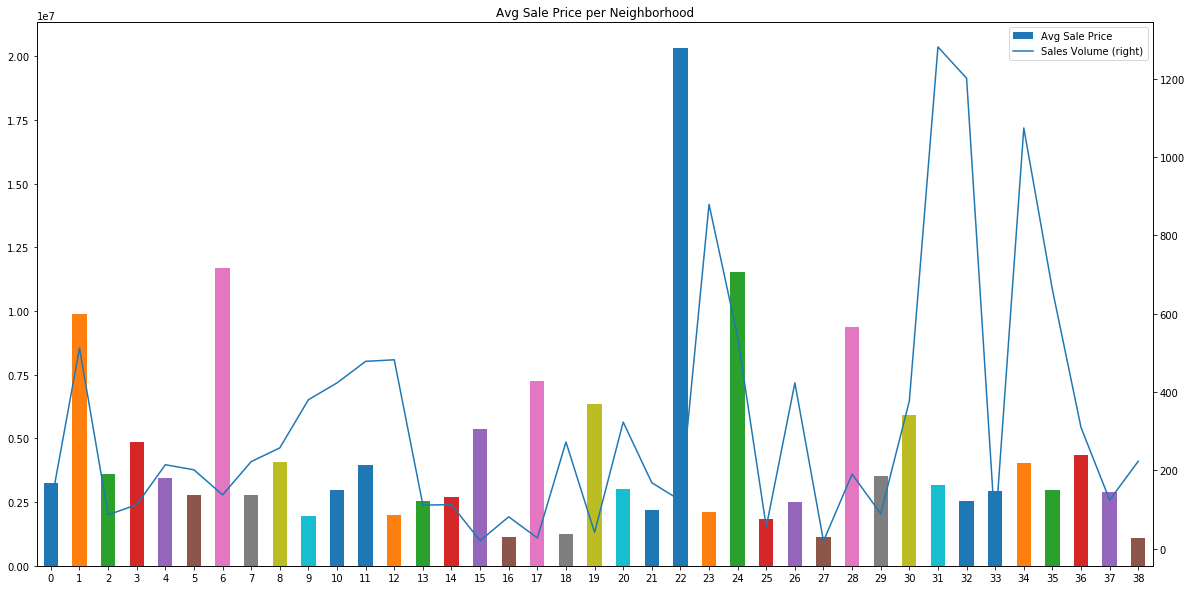

In [32]:
# x6 = np.arange(len(ny18_df_15))
y6 = ny18_df_15['Avg Sales']
y7=ny18_df_15['Sales Count']



ny18_df_15['Avg Sales'].plot(kind='bar',label="Avg Sale Price", legend=True,figsize=(20,10))
ny18_df_15['Sales Count'].plot(secondary_y=True, label="Sales Volume", legend=True,figsize=(20,10))
# tick_locations = x6
# plt.xlabel("Neighborhood")
# plt.legend(loc="best", fontsize="large", fancybox=True)
# tick_locations = x6
# plt.xticks(tick_locations,ny18_df_15['NEIGHBORHOOD'],rotation='vertical')
plt.title('Avg Sale Price per Neighborhood')

In [33]:
ny18_df_22 = ny18_df_1.loc[:,['NEIGHBORHOOD','ZIP CODE','SALE PRICE','SALE DATE']]
ny18_df_22=ny18_df_22[ny18_df_22['ZIP CODE']>10000]
ny18_df_22.head()

,NEIGHBORHOOD,ZIP CODE,SALE PRICE,SALE DATE
0,ALPHABET CITY,10009,4844809,2018-05-22
2,ALPHABET CITY,10009,6100000,2018-12-03
6,ALPHABET CITY,10009,8300000,2018-12-10
7,ALPHABET CITY,10009,10350000,2018-09-07
8,ALPHABET CITY,10009,5000000,2018-09-05


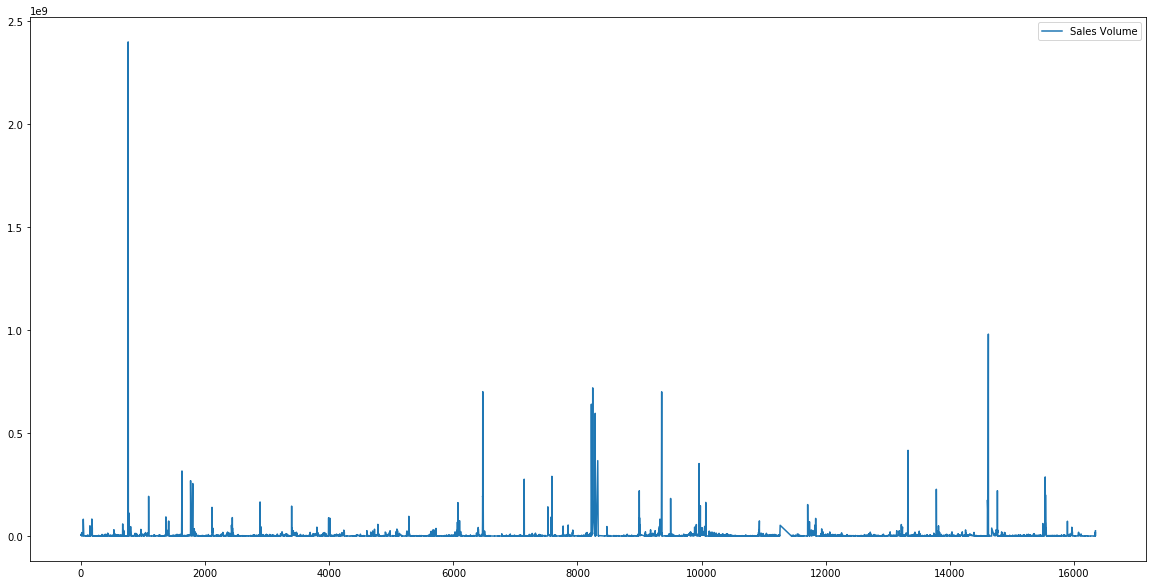

In [34]:
x10=ny18_df_22['SALE DATE']
y10=ny18_df_22['SALE PRICE']
# plt.plot(x10,y10,color='r',alpha=0.5,align='edge')
ny18_df_22['SALE PRICE'].plot(label="Sales Volume", legend=True,figsize=(20,10))
plt.show()

In [35]:
ny18_df_8

,NEIGHBORHOOD,ZIP CODE,SALE DATE,GROSS SQUARE FEET_sum,SALE PRICE_sum,SALE PRICE_count,Price per SqFt,Average Sale Amount
0,ALPHABET CITY,10009,2018-01-03,0,445000,1,inf,4.450000e+05
1,ALPHABET CITY,10009,2018-01-05,0,1100000,1,inf,1.100000e+06
2,ALPHABET CITY,10009,2018-01-10,1039,2750000,2,2646.775746,1.375000e+06
3,ALPHABET CITY,10009,2018-01-11,0,1177000,2,inf,5.885000e+05
4,ALPHABET CITY,10009,2018-01-16,0,375000,1,inf,3.750000e+05
5,ALPHABET CITY,10009,2018-01-18,0,455000,1,inf,4.550000e+05
6,ALPHABET CITY,10009,2018-01-31,0,435000,1,inf,4.350000e+05
7,ALPHABET CITY,10009,2018-02-08,420,1185000,2,2821.428571,5.925000e+05
8,ALPHABET CITY,10009,2018-02-15,671,692410,1,1031.907601,6.924100e+05
9,ALPHABET CITY,10009,2018-02-16,650,1150000,1,1769.230769,1.150000e+06


In [36]:
zipcode_grp = [[10026,10027,10030,10037,10039],[10001,10011,10018,10019,10020,10036],\
        [10029,10035], [10010,10016,10017,10022],\
        [10012,10013,10014],\
        [10004,10005,10006,10007,10038,10280],\
        [10002,10003,10009],\
        [10021,10028,10044,10065,10075,10128],\
        [10023,10024,10025],[10031,10032,10033,10034,10040]]
small_neighbor =['Central Harlem','Chelsea and Clinton','East Harlem','Gramercy Park and Murray Hill',\
               'Greenwich Village and Soho','Lower Manhattan','Lower East Side','Upper East Side',\
               'Upper West Side','Inwood and Washington Heights']

In [37]:
mydict1={}
for list1,neighbor1 in zip(zipcode_grp,small_neighbor):
    for val2 in list1:
        mydict1[val2]=neighbor1
print(mydict1)

{10026: 'Central Harlem', 10027: 'Central Harlem', 10030: 'Central Harlem', 10037: 'Central Harlem', 10039: 'Central Harlem', 10001: 'Chelsea and Clinton', 10011: 'Chelsea and Clinton', 10018: 'Chelsea and Clinton', 10019: 'Chelsea and Clinton', 10020: 'Chelsea and Clinton', 10036: 'Chelsea and Clinton', 10029: 'East Harlem', 10035: 'East Harlem', 10010: 'Gramercy Park and Murray Hill', 10016: 'Gramercy Park and Murray Hill', 10017: 'Gramercy Park and Murray Hill', 10022: 'Gramercy Park and Murray Hill', 10012: 'Greenwich Village and Soho', 10013: 'Greenwich Village and Soho', 10014: 'Greenwich Village and Soho', 10004: 'Lower Manhattan', 10005: 'Lower Manhattan', 10006: 'Lower Manhattan', 10007: 'Lower Manhattan', 10038: 'Lower Manhattan', 10280: 'Lower Manhattan', 10002: 'Lower East Side', 10003: 'Lower East Side', 10009: 'Lower East Side', 10021: 'Upper East Side', 10028: 'Upper East Side', 10044: 'Upper East Side', 10065: 'Upper East Side', 10075: 'Upper East Side', 10128: 'Upper E

In [38]:
ny18_df_8['small neighbor'] = ny18_df_8['ZIP CODE'].map(mydict1)

In [39]:
ny18_df_8

,NEIGHBORHOOD,ZIP CODE,SALE DATE,GROSS SQUARE FEET_sum,SALE PRICE_sum,SALE PRICE_count,Price per SqFt,Average Sale Amount,small neighbor
0,ALPHABET CITY,10009,2018-01-03,0,445000,1,inf,4.450000e+05,Lower East Side
1,ALPHABET CITY,10009,2018-01-05,0,1100000,1,inf,1.100000e+06,Lower East Side
2,ALPHABET CITY,10009,2018-01-10,1039,2750000,2,2646.775746,1.375000e+06,Lower East Side
3,ALPHABET CITY,10009,2018-01-11,0,1177000,2,inf,5.885000e+05,Lower East Side
4,ALPHABET CITY,10009,2018-01-16,0,375000,1,inf,3.750000e+05,Lower East Side
5,ALPHABET CITY,10009,2018-01-18,0,455000,1,inf,4.550000e+05,Lower East Side
6,ALPHABET CITY,10009,2018-01-31,0,435000,1,inf,4.350000e+05,Lower East Side
7,ALPHABET CITY,10009,2018-02-08,420,1185000,2,2821.428571,5.925000e+05,Lower East Side
8,ALPHABET CITY,10009,2018-02-15,671,692410,1,1031.907601,6.924100e+05,Lower East Side
9,ALPHABET CITY,10009,2018-02-16,650,1150000,1,1769.230769,1.150000e+06,Lower East Side


In [40]:
ny18_df_25=ny18_df_8.loc[:,['small neighbor','Average Sale Amount']]
ny18_df_25.head()

,small neighbor,Average Sale Amount
0,Lower East Side,445000.0
1,Lower East Side,1100000.0
2,Lower East Side,1375000.0
3,Lower East Side,588500.0
4,Lower East Side,375000.0


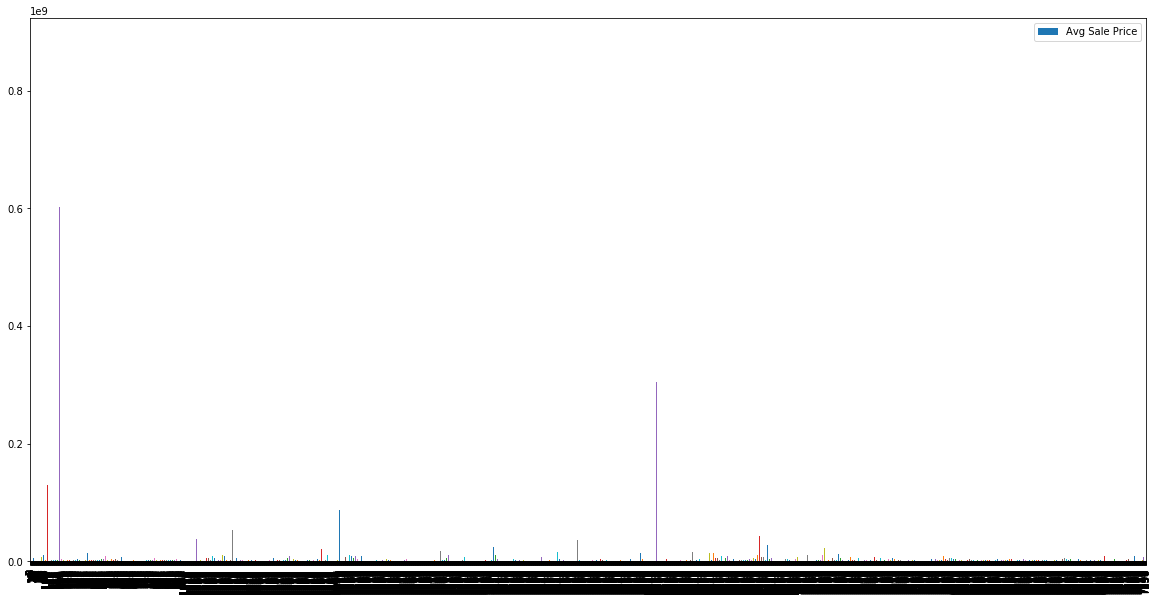

In [49]:
ny18_df_25['Average Sale Amount'].plot(kind='bar',label="Avg Sale Price", legend=True,figsize=(20,10))
plt.show()

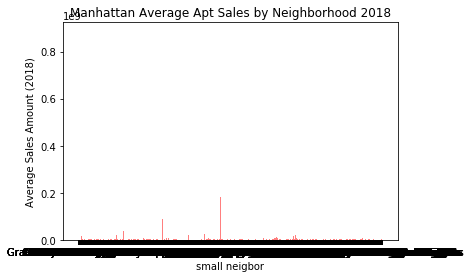

In [50]:
x25 = np.arange(len(ny18_df_25))
y25 = ny18_df_25['Average Sale Amount']
tick_locations = [value for value in x25]
# plt.figure(figsize=(15,10))
plt.bar(x25,y25,color='r',alpha=0.5,align='edge')
plt.xticks(tick_locations,ny18_df_25['small neighbor'],rotation='horizontal')
# plt.xlim(0,len(x))
# plt.ylim(1000000,max(y))
plt.xlabel("small neigbor")
plt.ylabel("Average Sales Amount (2018)")
plt.title("Manhattan Average Apt Sales by Neighborhood 2018")
plt.show()

In [ ]:
# bins = pd.IntervalIndex.from_arrays[[10026,10027,10030,10037,10039],[10001,10011,10018,10019,10020,10036],\
#         [10029,10035], [10010,10016,10017,10022],\
#         [10012,10013,10014],\
#         [10004,10005,10006,10007,10038,10280],\
#         [10002,10003,10009],\
#         [10021,10028,10044,10065,10075,10128],\
#         [10023,10024,10025],[10031,10032,10033,10034,10040]]

# neighborhood =['Central Harlem','Chelsea and Clinton','East Harlem','Gramercy Park and Murray Hill',\
#                'Greenwich Village and Soho','Lower Manhattan','Lower East Side','Upper East Side',\
#                'Upper West Side','Inwood and Washington Heights']

In [ ]:
pd.cut(ny18_df_22['ZIP CODE'],bins,labels=neighborhood)

In [ ]:
# # Create bins in which to place values based upon TED Talk views
# bins = [0, 200000, 400000, 600000, 800000, 1000000,
#         2000000, 3000000, 4000000, 5000000, 50000000]

# # Create labels for these bins
# group_labels = ["0 to 200k", "200k to 400k", "400k to 600k", "600k to 800k", "800k to 1mil", "1mil to 2mil",
#                 "2mil to 3mil", "3mil to 4mil", "4mil to 5mil", "5mil to 50mil"]

# # Slice the data and place it into bins
# pd.cut(ted_df["views"], bins, labels=group_labels).head()

# # Place the data series into a new column inside of the DataFrame
# ted_df["View Group"] = pd.cut(ted_df["views"], bins, labels=group_labels)
# ted_df.head()

# # Create a GroupBy object based upon "View Group"
# ted_group = ted_df.groupby("View Group")

# # Find how many rows fall into each bin
# print(ted_group["comments"].count())

# # Get the average of each column within the GroupBy object
# ted_group[["comments", "duration", "languages"]].mean()

In [ ]:
# x2=ny18_df_8['NEIGHBORHOOD']
# y2=ny18_df_8['Average Sale Amount']
# ny18_df_10 = ny18_df_8.plot(x2,y2,use_index=True,legend=True,\
#                title="Sales by Neighborhood (2018)",xlabel='Neighborhood',\
#                ylabel='Avg Sales (2018)',xlim=(-3,len(x2)),ylim=(0,max(y)),\
#               figsize=(50,25))
# plt.show()

# figsize=None, use_index=True, title=None, grid=None, legend=True, 
# style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, 
# xlim=None, ylim=None, rot=None, fontsize=None, colormap=None, table=False, 
# yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds
# x = np.arange(len(ny18_df_5))
# y = ny18_df_5['SALE PRICE']
# tick_locations = [value for value in x]
# plt.figure(figsize=(30,5))
# plt.bar(x,y,color='r',alpha=0.5,align='edge')
# plt.xticks(tick_locations,ny18_df_5['ZIP CODE'],rotation='vertical')
# plt.xlim(-3,len(x))
# plt.ylim(0,max(y)+10)
# plt.xlabel("Manhattan Zip Codes")
# plt.ylabel("Number of Sales (2018)")
# plt.title("Manhattan Apartment Sales by Zip Code 2018")